<a href="https://colab.research.google.com/github/Mwaniki25/Carrefour_Marketing_Analysis_R/blob/main/Feature_selection_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relevant Marketting Strategies at Carrefour Kenya 

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> A Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

### b) Defining the Metric for Success

> Perform 
- Dimensionality Reduction
- Feature Selection
- Association Rules
- Anomaly detection

# **Part 1: Dimensionality Reduction**

In [1]:
# Loading our Data
# ---
#  

# importing our data
# reading our data


path<-'http://bit.ly/CarreFourDataset'

dataset<-read.csv(path, sep = ",", dec = ".",row.names = 1)
head(dataset,3)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255


In [2]:
sum(is.na(dataset))

[1] 0

In [3]:
sum(duplicated(dataset))

[1] 0

In [4]:
colnames(dataset)

[1] "Branch"                  "Customer.type"          
 [3] "Gender"                  "Product.line"           
 [5] "Unit.price"              "Quantity"               
 [7] "Tax"                     "Date"                   
 [9] "Time"                    "Payment"                
[11] "cogs"                    "gross.margin.percentage"
[13] "gross.income"            "Rating"                 
[15] "Total"

In [5]:
sapply(dataset,class)

Branch           Customer.type                  Gender 
            "character"             "character"             "character" 
           Product.line              Unit.price                Quantity 
            "character"               "numeric"               "integer" 
                    Tax                    Date                    Time 
              "numeric"             "character"             "character" 
                Payment                    cogs gross.margin.percentage 
            "character"               "numeric"               "numeric" 
           gross.income                  Rating                   Total 
              "numeric"               "numeric"               "numeric"

In [6]:
# Convert data types using as.integer
# Branch
dataset$Branch <- (as.factor(dataset$Branch))
# Customer Type
dataset$Customer.type <- (as.factor(dataset$Customer.type))
# Gender
dataset$Gender <- (as.factor(dataset$Gender))
# Product.line
dataset$Product.line <- (as.factor(dataset$Product.line))
#Payment
dataset$Payment <- (as.factor(dataset$Payment))


In [7]:
head(dataset)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [8]:
library(lubridate)
library(dplyr)


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [9]:
# Split date year, month and day.
# Convert to date datatype first then split thereafter
dataset$Date <- as.Date(dataset$Date, "%m/%d/%Y")
dataset$year <- year(ymd(dataset$Date))
dataset$month <- month(ymd(dataset$Date))
dataset$day <- day(ymd(dataset$Date))
dataset$hour = format(strptime(dataset$Time,"%H:%M"),'%H')
dataset$minute = format(strptime(dataset$Time,"%H:%M"),'%M')


In [10]:
# Selecting the numerical data 
# 
dataset_num <- select_if(dataset,is.numeric)
str(dataset_num)

'data.frame':	1000 obs. of  11 variables:
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...
 $ year                   : num  2019 2019 2019 2019 2019 ...
 $ month                  : num  1 3 3 1 2 3 2 2 1 2 ...
 $ day                    : int  5 8 3 27 8 25 25 24 10 20 ...


In [11]:
# Identify the columns with zero column variance.
names(dataset_num[, sapply(dataset_num, function(v) var(v,
na.rm=TRUE)==0)])

[1] "gross.margin.percentage" "year"

In [12]:
# Drop the columns as they result to error "stop("cannot rescale a
# constant/zero column to unit variance")"
dataset_num <- subset(dataset_num, select = -c(gross.margin.percentage,
year))


In [13]:
dim(dataset_num)

[1] 1000    9

# Principal Component Analysis

In [14]:
dataset_pca <- prcomp(dataset_num, center = TRUE, scale. = TRUE)
summary(dataset_pca)


Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6       PC7
Standard deviation     2.2187 1.0704 1.0068 0.9858 0.92540 0.29986 1.675e-16
Proportion of Variance 0.5469 0.1273 0.1126 0.1080 0.09515 0.00999 0.000e+00
Cumulative Proportion  0.5469 0.6743 0.7869 0.8949 0.99001 1.00000 1.000e+00
                            PC8       PC9
Standard deviation     1.19e-16 3.509e-17
Proportion of Variance 0.00e+00 0.000e+00
Cumulative Proportion  1.00e+00 1.000e+00

In [15]:

# Installing our ggbiplot visualisation package
# 
library(devtools)
install_github("vqv/ggbiplot")

Loading required package: usethis




plyr (NA -> 1.8.6) [CRAN]


Installing 1 packages: plyr

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpPntgam/remotes3bd1d7912/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



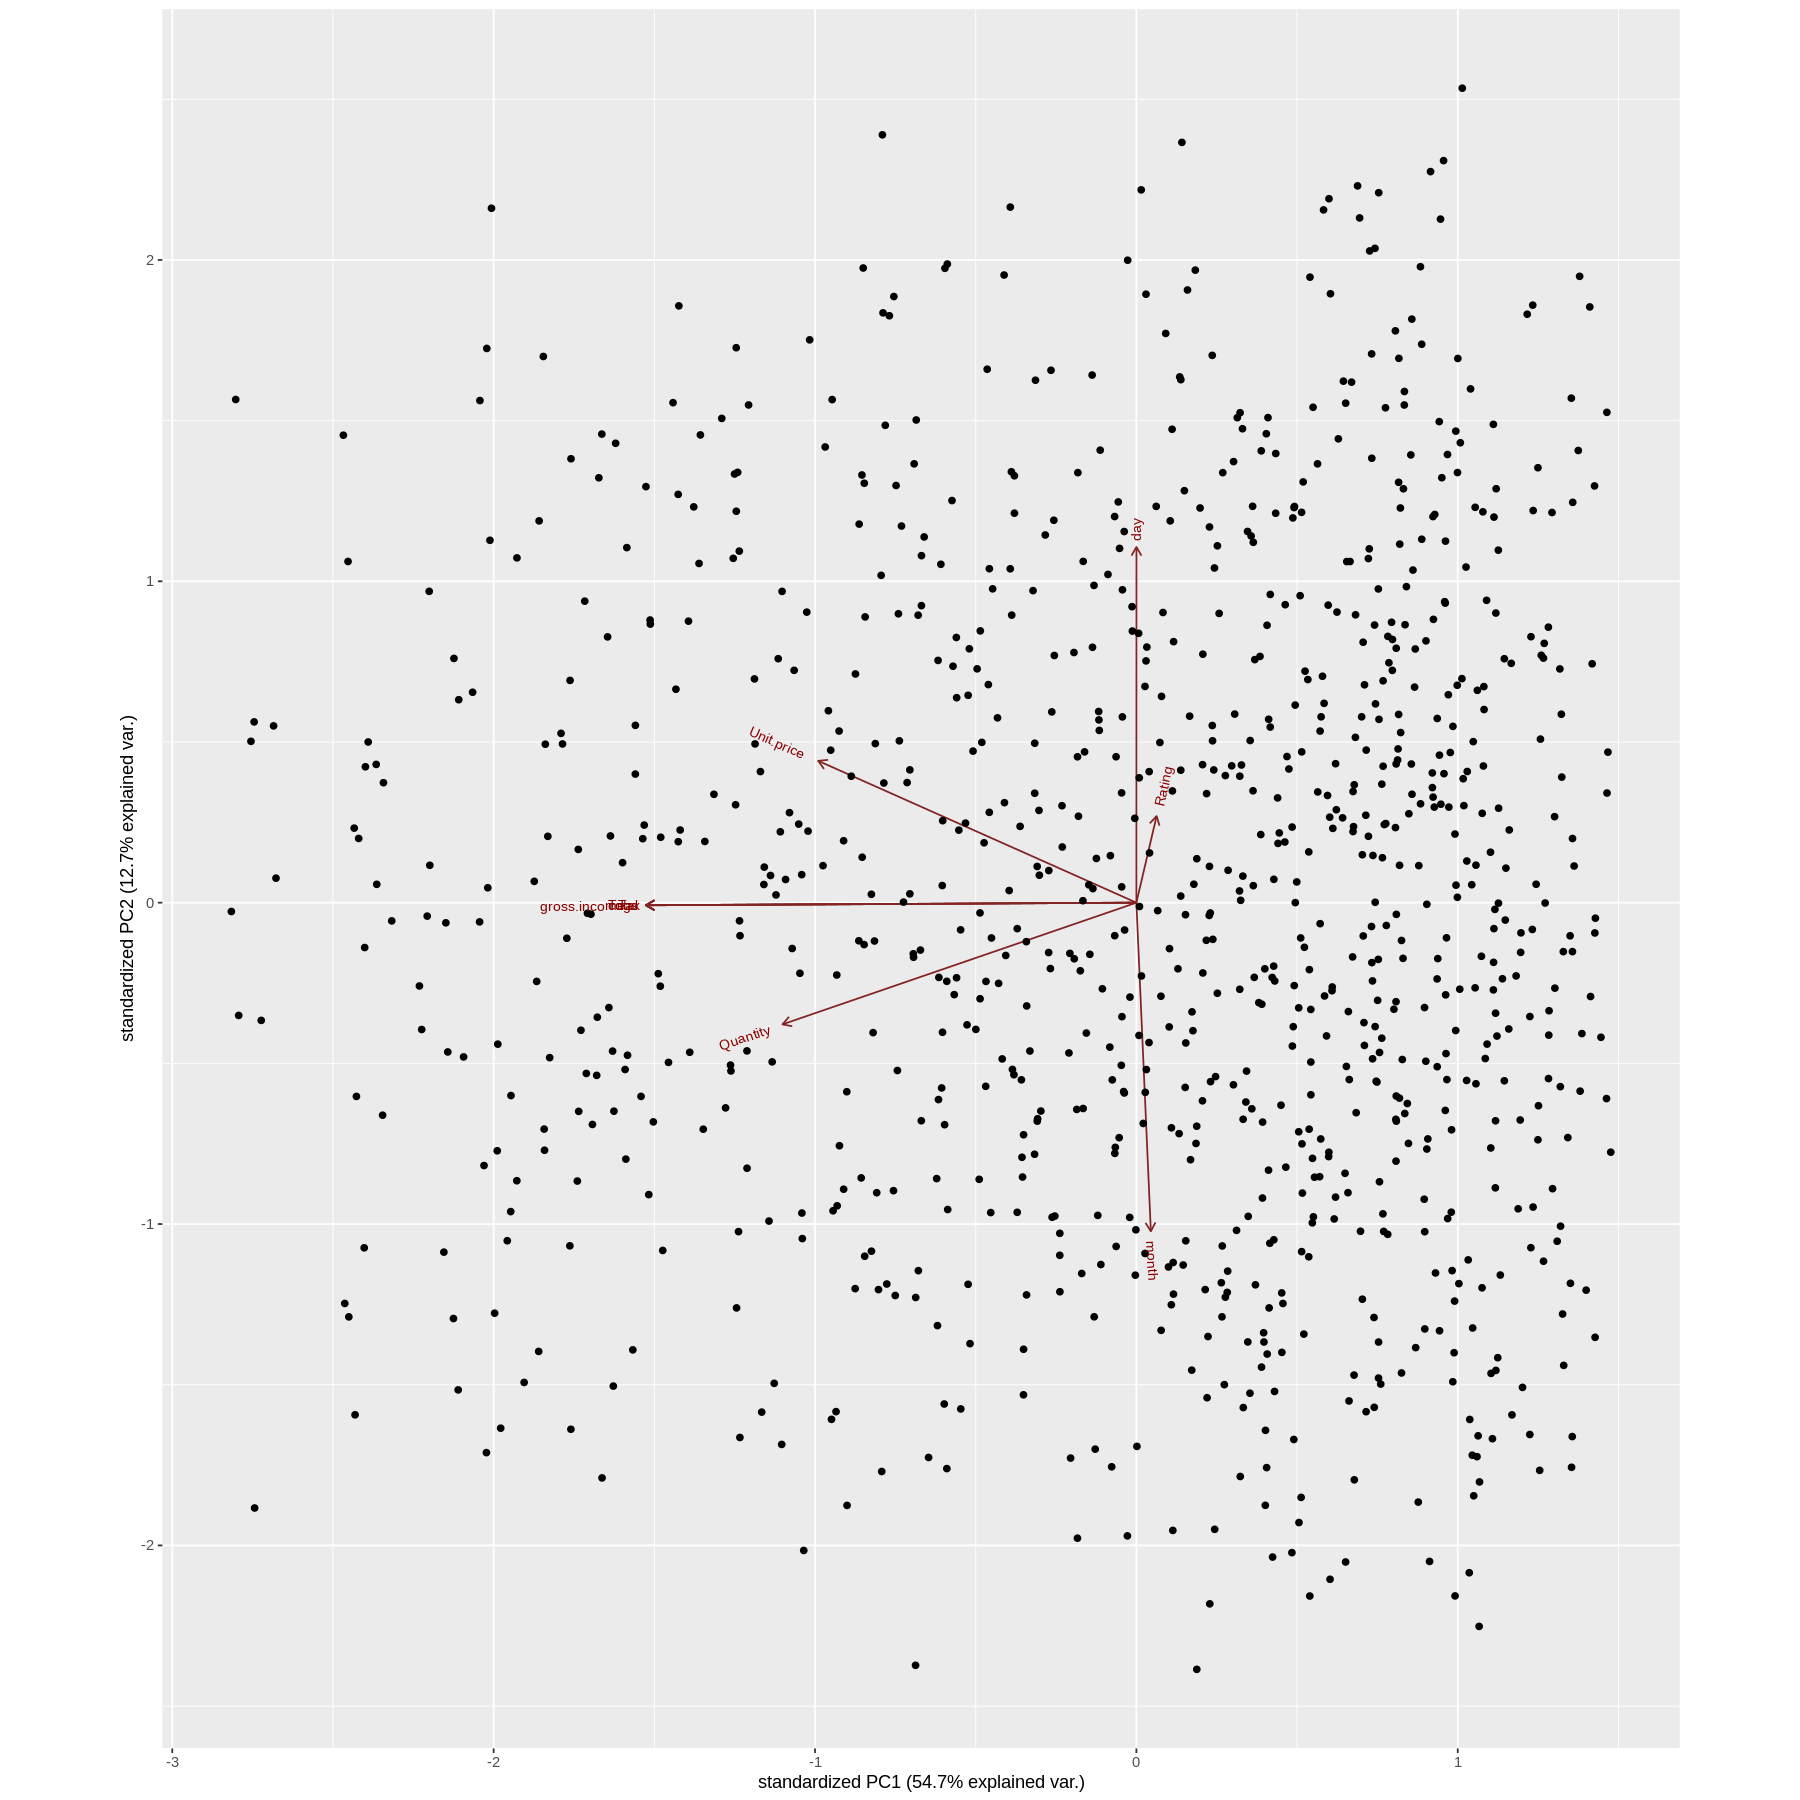

In [92]:
# Then Loading our ggbiplot library
# 
 
options(repr.plot.width = 15, repr.plot.height = 15)
library(ggbiplot)
ggbiplot(dataset_pca)

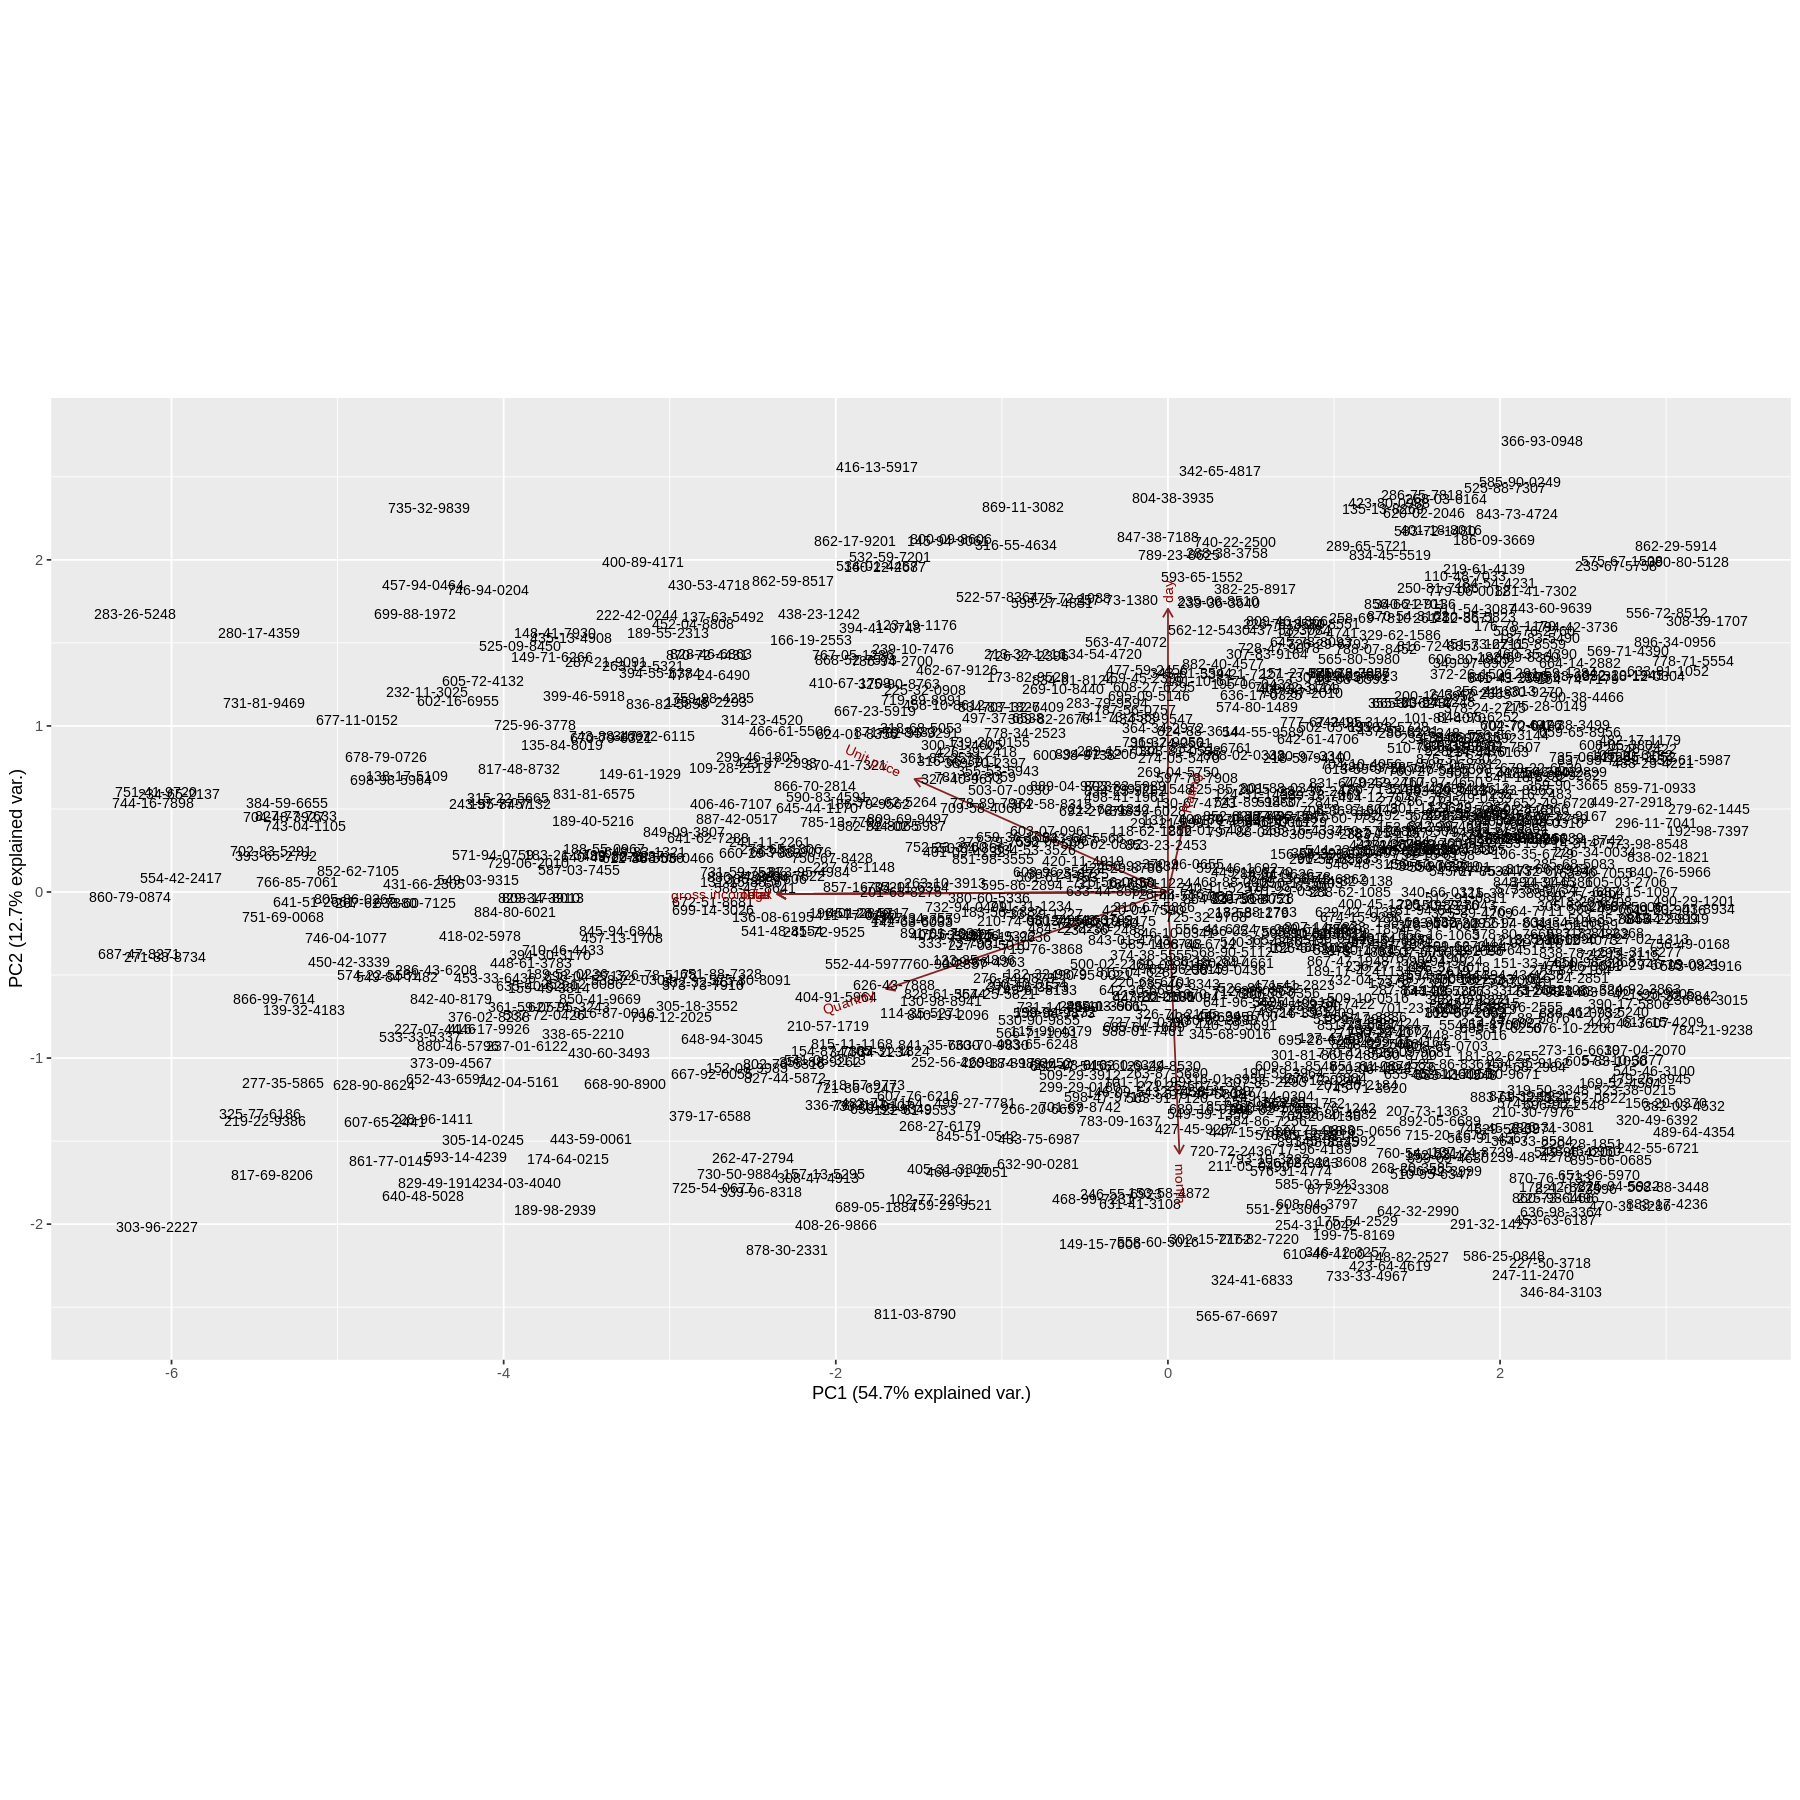

In [91]:

# adding more detail to the plot
options(repr.plot.width = 15, repr.plot.height = 15)
ggbiplot(dataset_pca, labels = rownames(dataset_num), obs.scale = 1, var.scale = 1)

 # t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [18]:
install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
# loading Rtsne library
library(Rtsne)

In [20]:
tsne <- Rtsne(dataset_num, dims = 2, perplexity=30, verbose=TRUE, max_iter =
500)


Performing PCA
Read the 1000 x 9 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.08 seconds (sparsity = 0.101252)!
Learning embedding...
Iteration 50: error is 59.805950 (50 iterations in 0.11 seconds)
Iteration 100: error is 52.058105 (50 iterations in 0.09 seconds)
Iteration 150: error is 50.956917 (50 iterations in 0.09 seconds)
Iteration 200: error is 50.590965 (50 iterations in 0.10 seconds)
Iteration 250: error is 50.289362 (50 iterations in 0.10 seconds)
Iteration 300: error is 0.616152 (50 iterations in 0.10 seconds)
Iteration 350: error is 0.452043 (50 iterations in 0.09 seconds)
Iteration 400: error is 0.414946 (50 iterations in 0.09 seconds)
Iteration 450: error is 0.396262 (50 iterations in 0.10 seconds)
Iteration 500: error is 0.386087 (50 iterations in 0.10 seconds)
Fitting performed in 0.97 seconds.


In [21]:
# Plotting using Branch as factors
colors = rainbow(length(unique(dataset$Branch)))
names(colors) = unique(dataset$Branch)

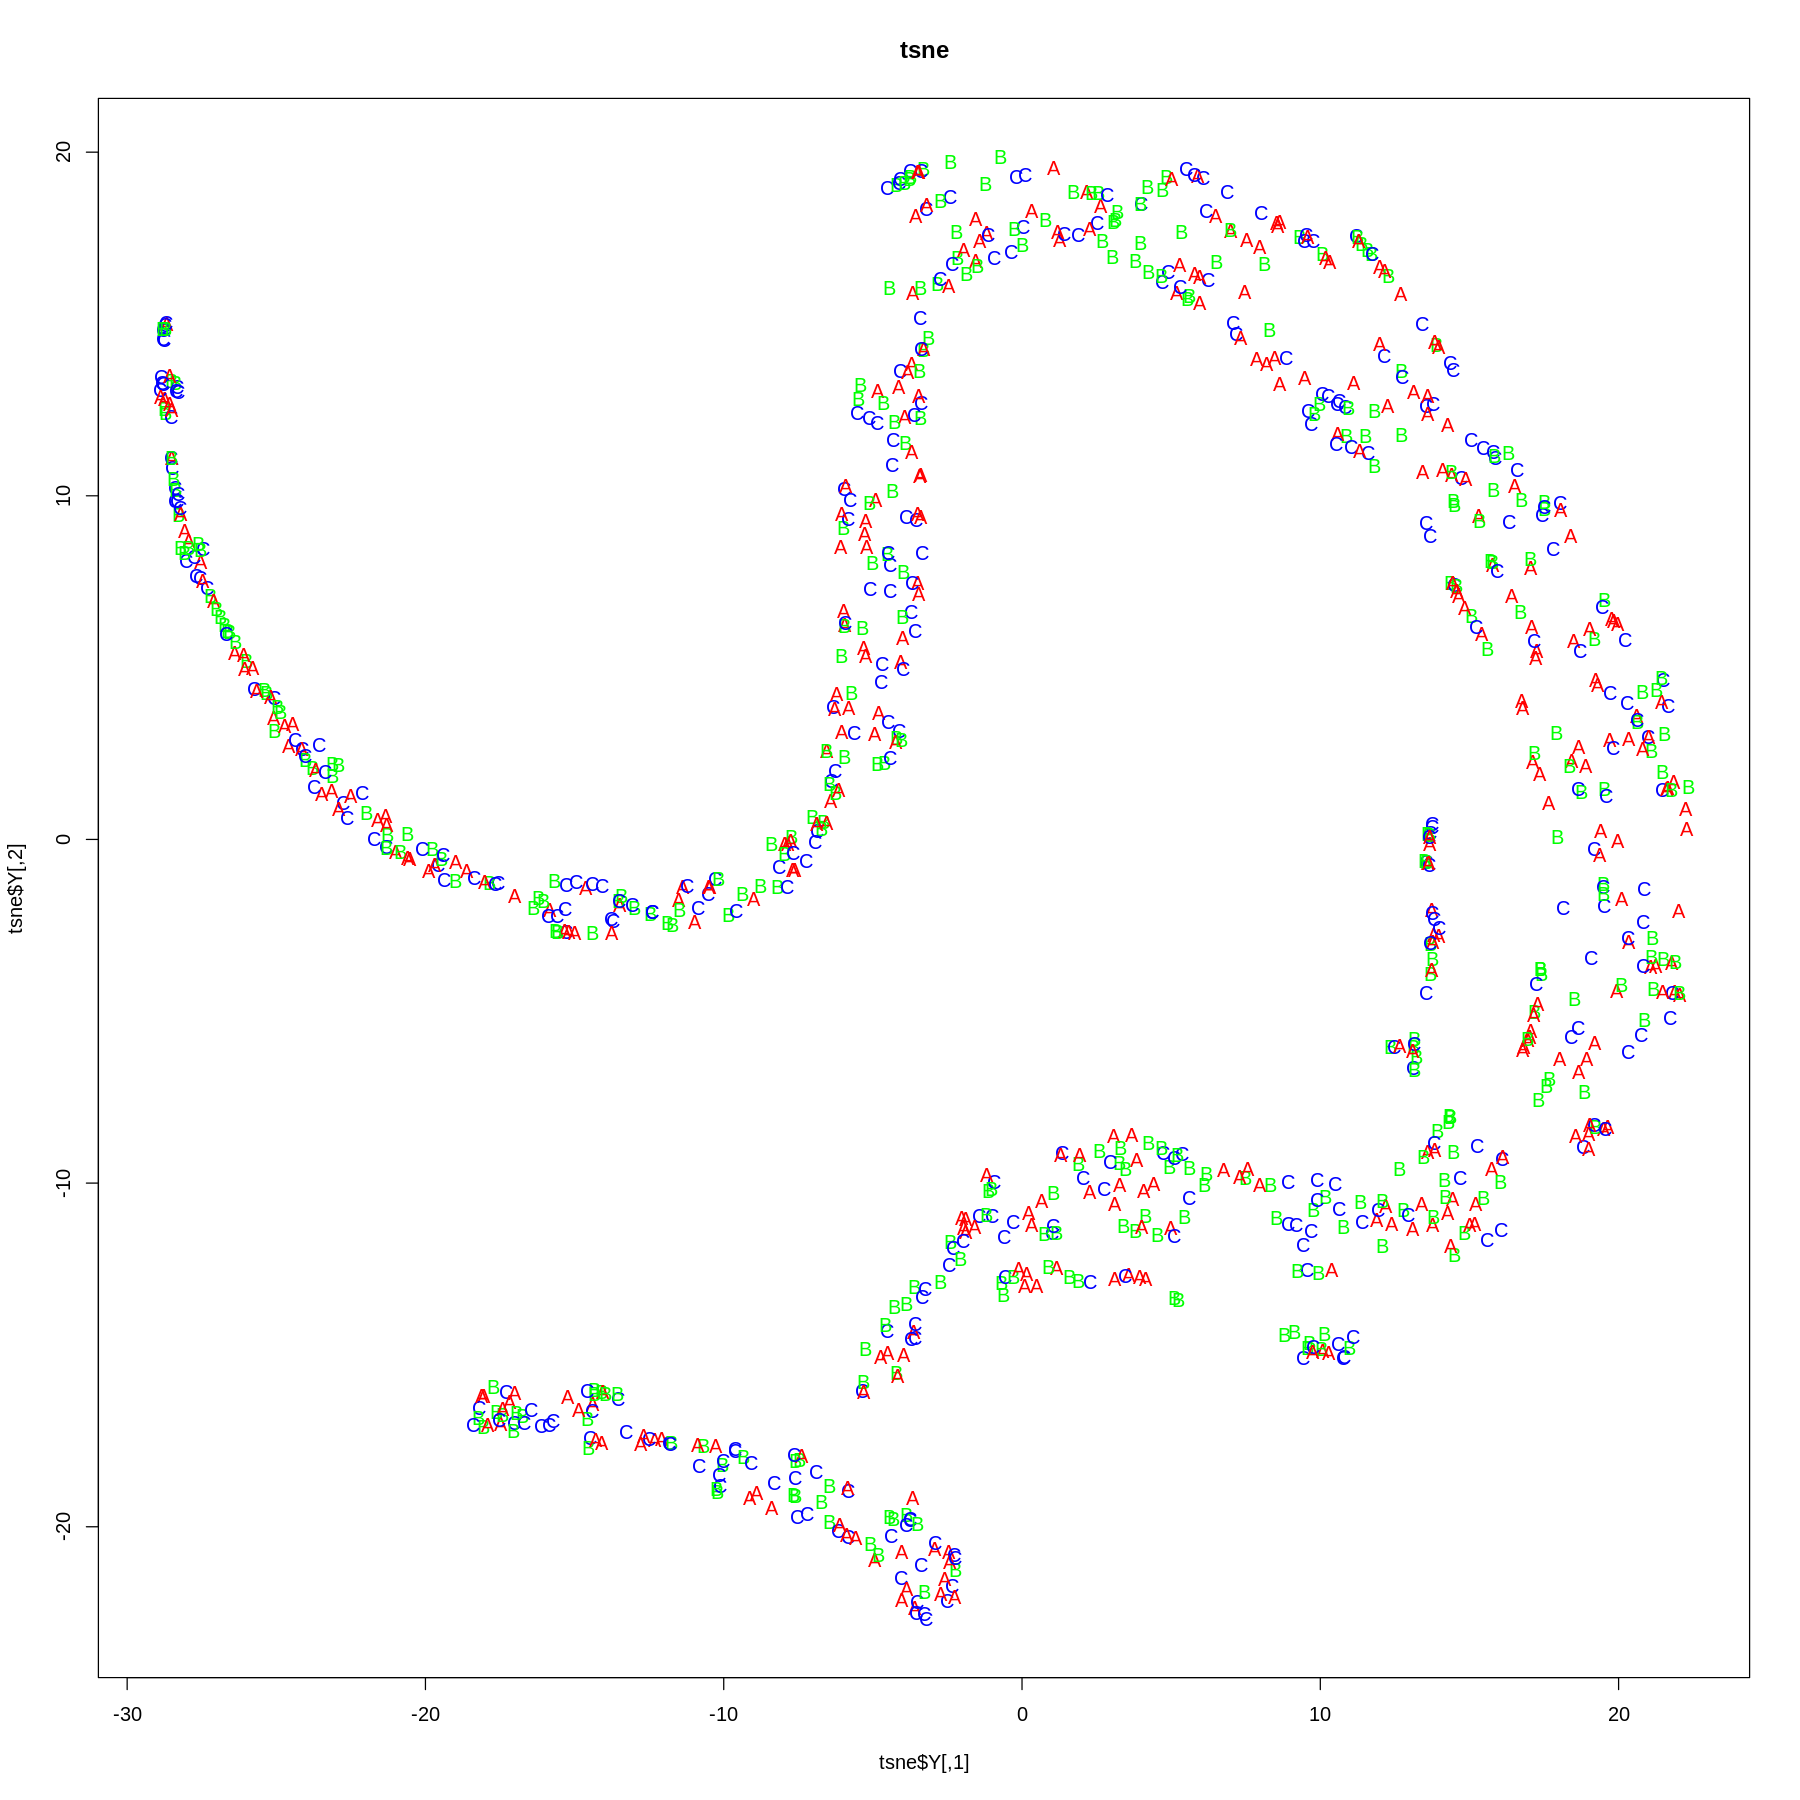

In [90]:
# plotting our graph
options(repr.plot.width = 15, repr.plot.height = 15)
plot(tsne$Y, t = 'n', main = 'tsne')
text(tsne$Y, labels = dataset$Branch,
col = colors[dataset$Branch])

# **Part 2: Feature Selection**

In [23]:
# Installing and loading our caret package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)

Loading required package: lattice



In [24]:
# Installing and loading the corrplot package for plotting
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(corrplot, quietly=TRUE))
                install.packages("corrplot")))
library(corrplot)

corrplot 0.88 loaded



In [25]:
# Calculating the correlation matrix
# ---
#
correlationMatrix <- cor(dataset_num)

In [26]:
# Find attributes that are highly correlated
# ---
#
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

In [27]:

# Highly correlated attributes
# ---
# 
highlyCorrelated

names(dataset_num[,highlyCorrelated])

[1] 4 7 3

[1] "cogs"  "Total" "Tax"

In [28]:
# We can remove the variables with a higher correlation 
# and comparing the results graphically as shown below
# ---
# 
# Removing Redundant Features 
# ---
# 
dataset2<-dataset_num[-highlyCorrelated]

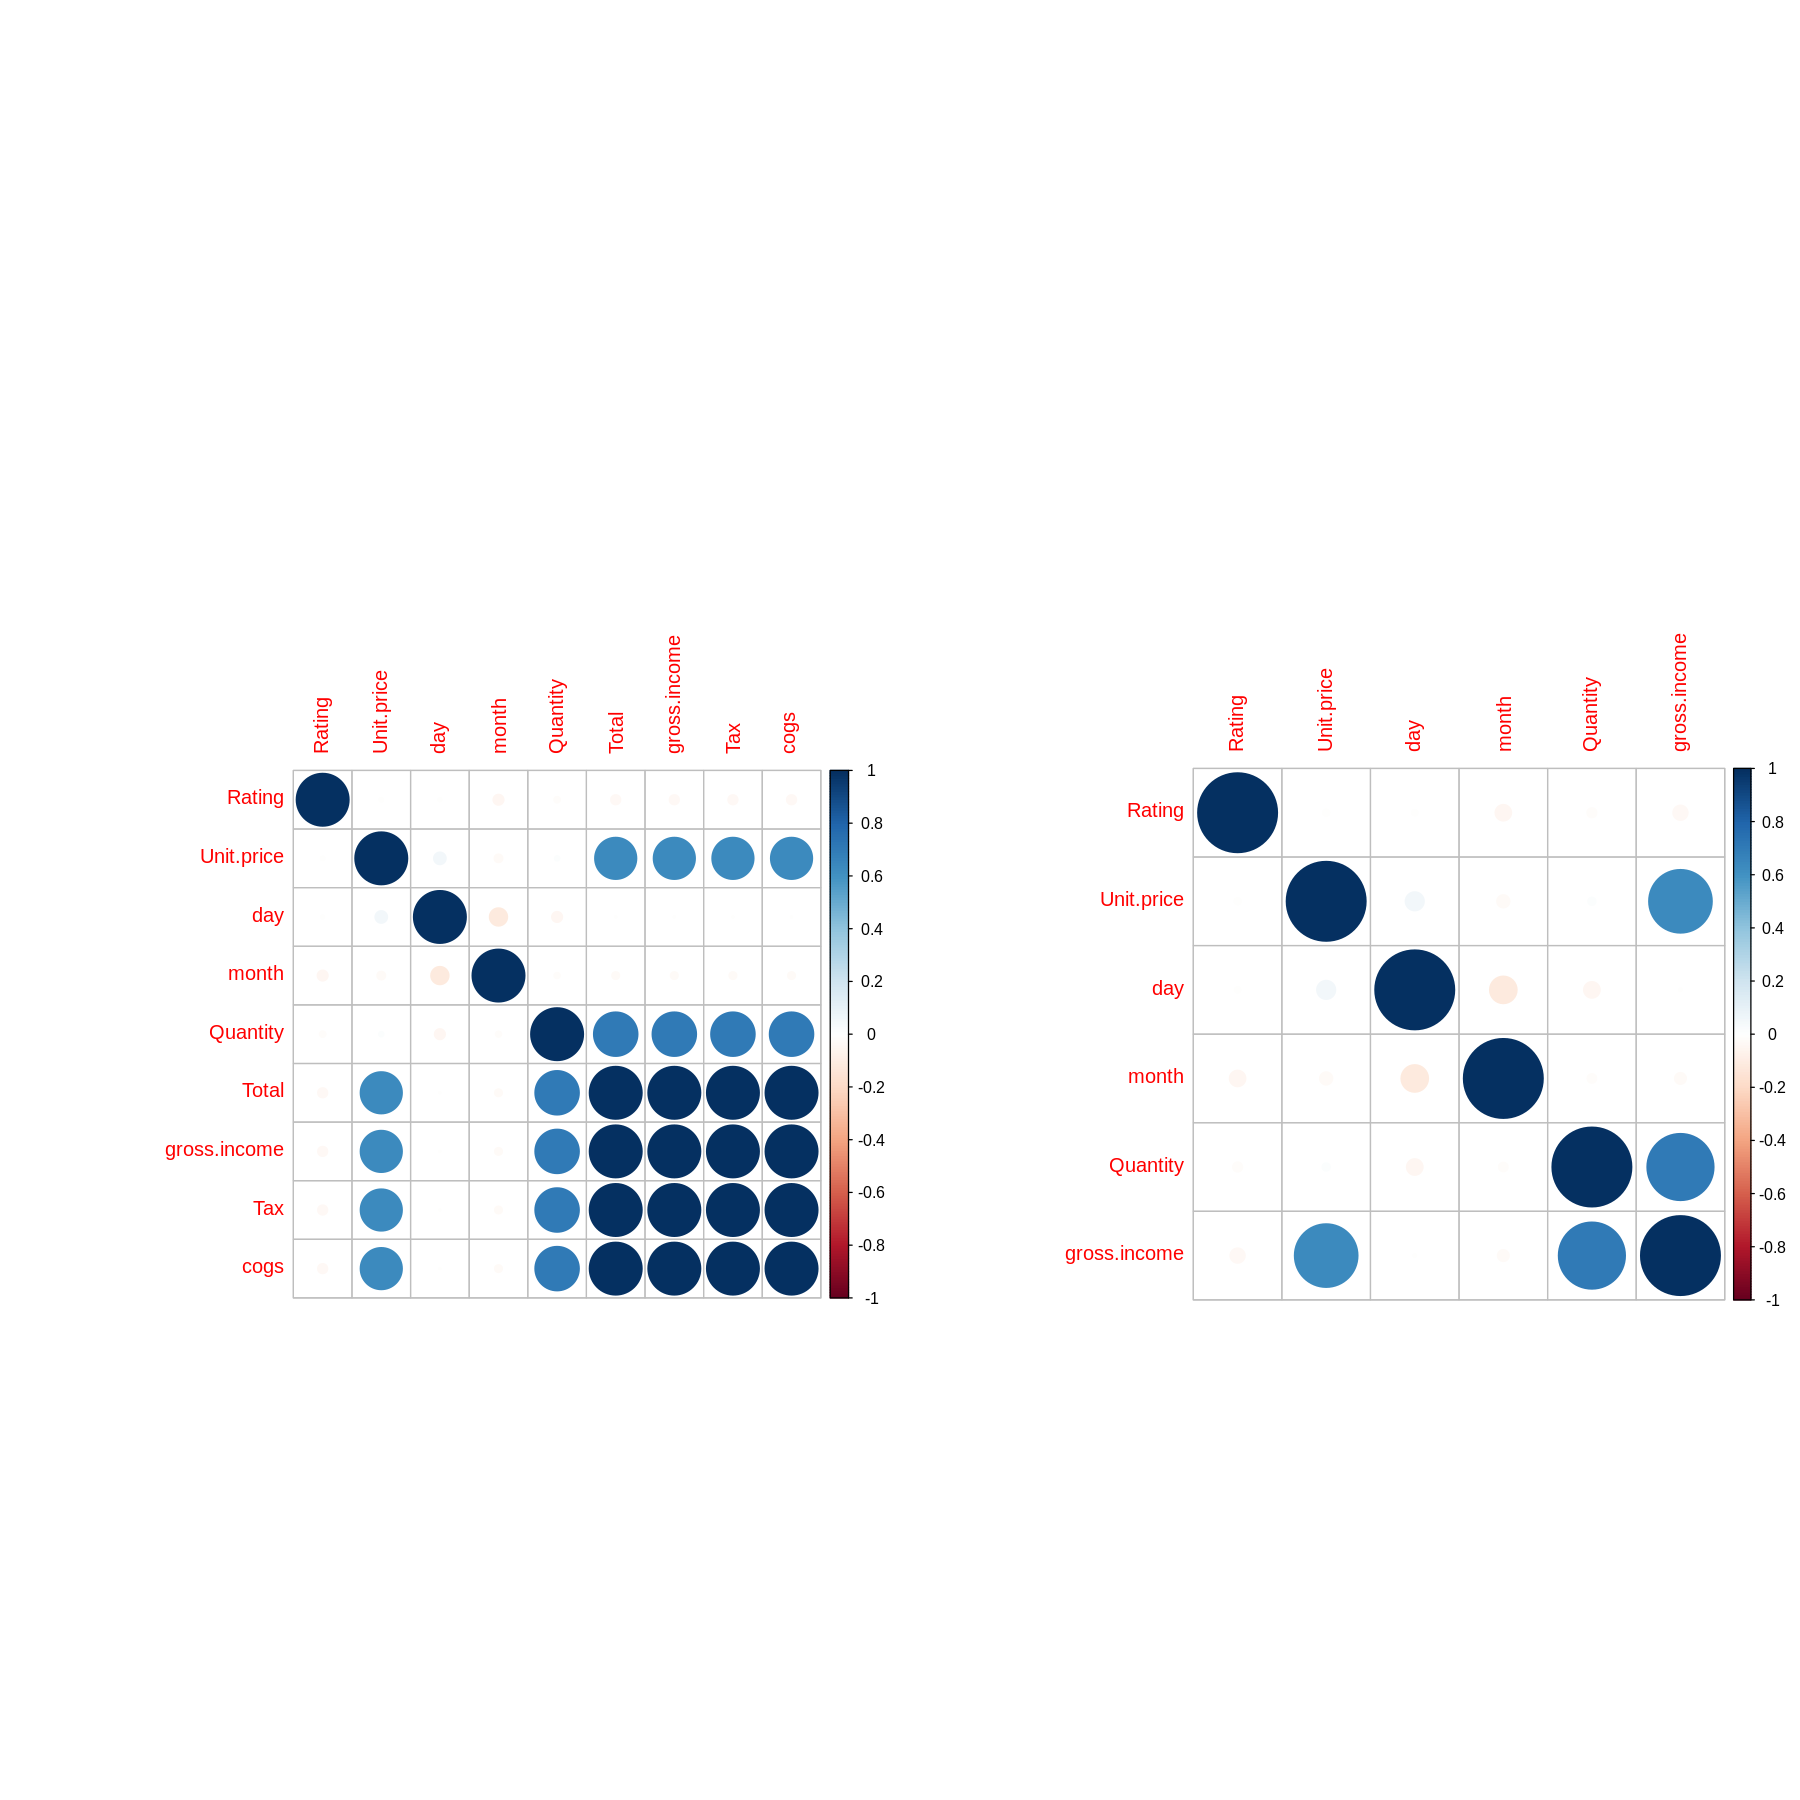

In [89]:
# Performing our graphical comparison
# ---
# 
options(repr.plot.width = 15, repr.plot.height = 15)
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(dataset2), order = "hclust")

Wrapper Methods 

In [30]:
# ---
# We use the clustvarsel package that contains an implementation of wrapper methods. 
# The clustvarsel function will implement variable section methodology 
# for model-based clustering to find the optimal subset of variables in a dataset.

In [31]:
# Installing and loading our clustvarsel package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(clustvarsel, quietly=TRUE))
                install.packages("clustvarsel")))
                         
library(clustvarsel)

Loading required package: mclust

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.

Package 'clustvarsel' version 2.3.4

Type 'citation("clustvarsel")' for citing this R package in publications.



In [32]:
# Installing and loading our mclust package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(mclust, quietly=TRUE))
                install.packages("mclust")))
library(mclust)

In [33]:
# Sequential forward greedy search (default)
# ---
#
out = clustvarsel(dataset_num, G = 1:9)
out


------------------------------------------------------ 
Variable selection for Gaussian model-based clustering
Stepwise (forward/backward) greedy search
------------------------------------------------------ 

 Variable proposed Type of step   BICclust Model G   BICdiff Decision
          Quantity          Add  -4308.761     E 9  687.4466 Accepted
              cogs          Add -16306.851   VEV 9 1083.0132 Accepted
        Unit.price          Add -21393.079   EVV 7 2812.3733 Accepted
        Unit.price       Remove -16306.851   VEV 9 2812.3733 Rejected
            Rating          Add -25510.859   EVV 7 -184.0917 Rejected
        Unit.price       Remove -16306.851   VEV 9 2812.3733 Rejected

Selected subset: Quantity, cogs, Unit.price

In [34]:
# The selection algorithm would indicate that the subset 
# we use for the clustering model is composed of variables X1 and X2 
# and that other variables should be rejected. 
# Having identified the variables that we use, we proceed to build the clustering model:
# ---
#

Subset1 = dataset[,out$subset]
mod = Mclust(Subset1, G = 1:9)
summary(mod)


---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EII (spherical, equal volume) model with 6 components: 

 log-likelihood    n df       BIC       ICL
      -3658.618 1000 24 -7483.023 -7897.179

Clustering table:
  1   2   3   4   5   6 
185 182 141 166 221 105 

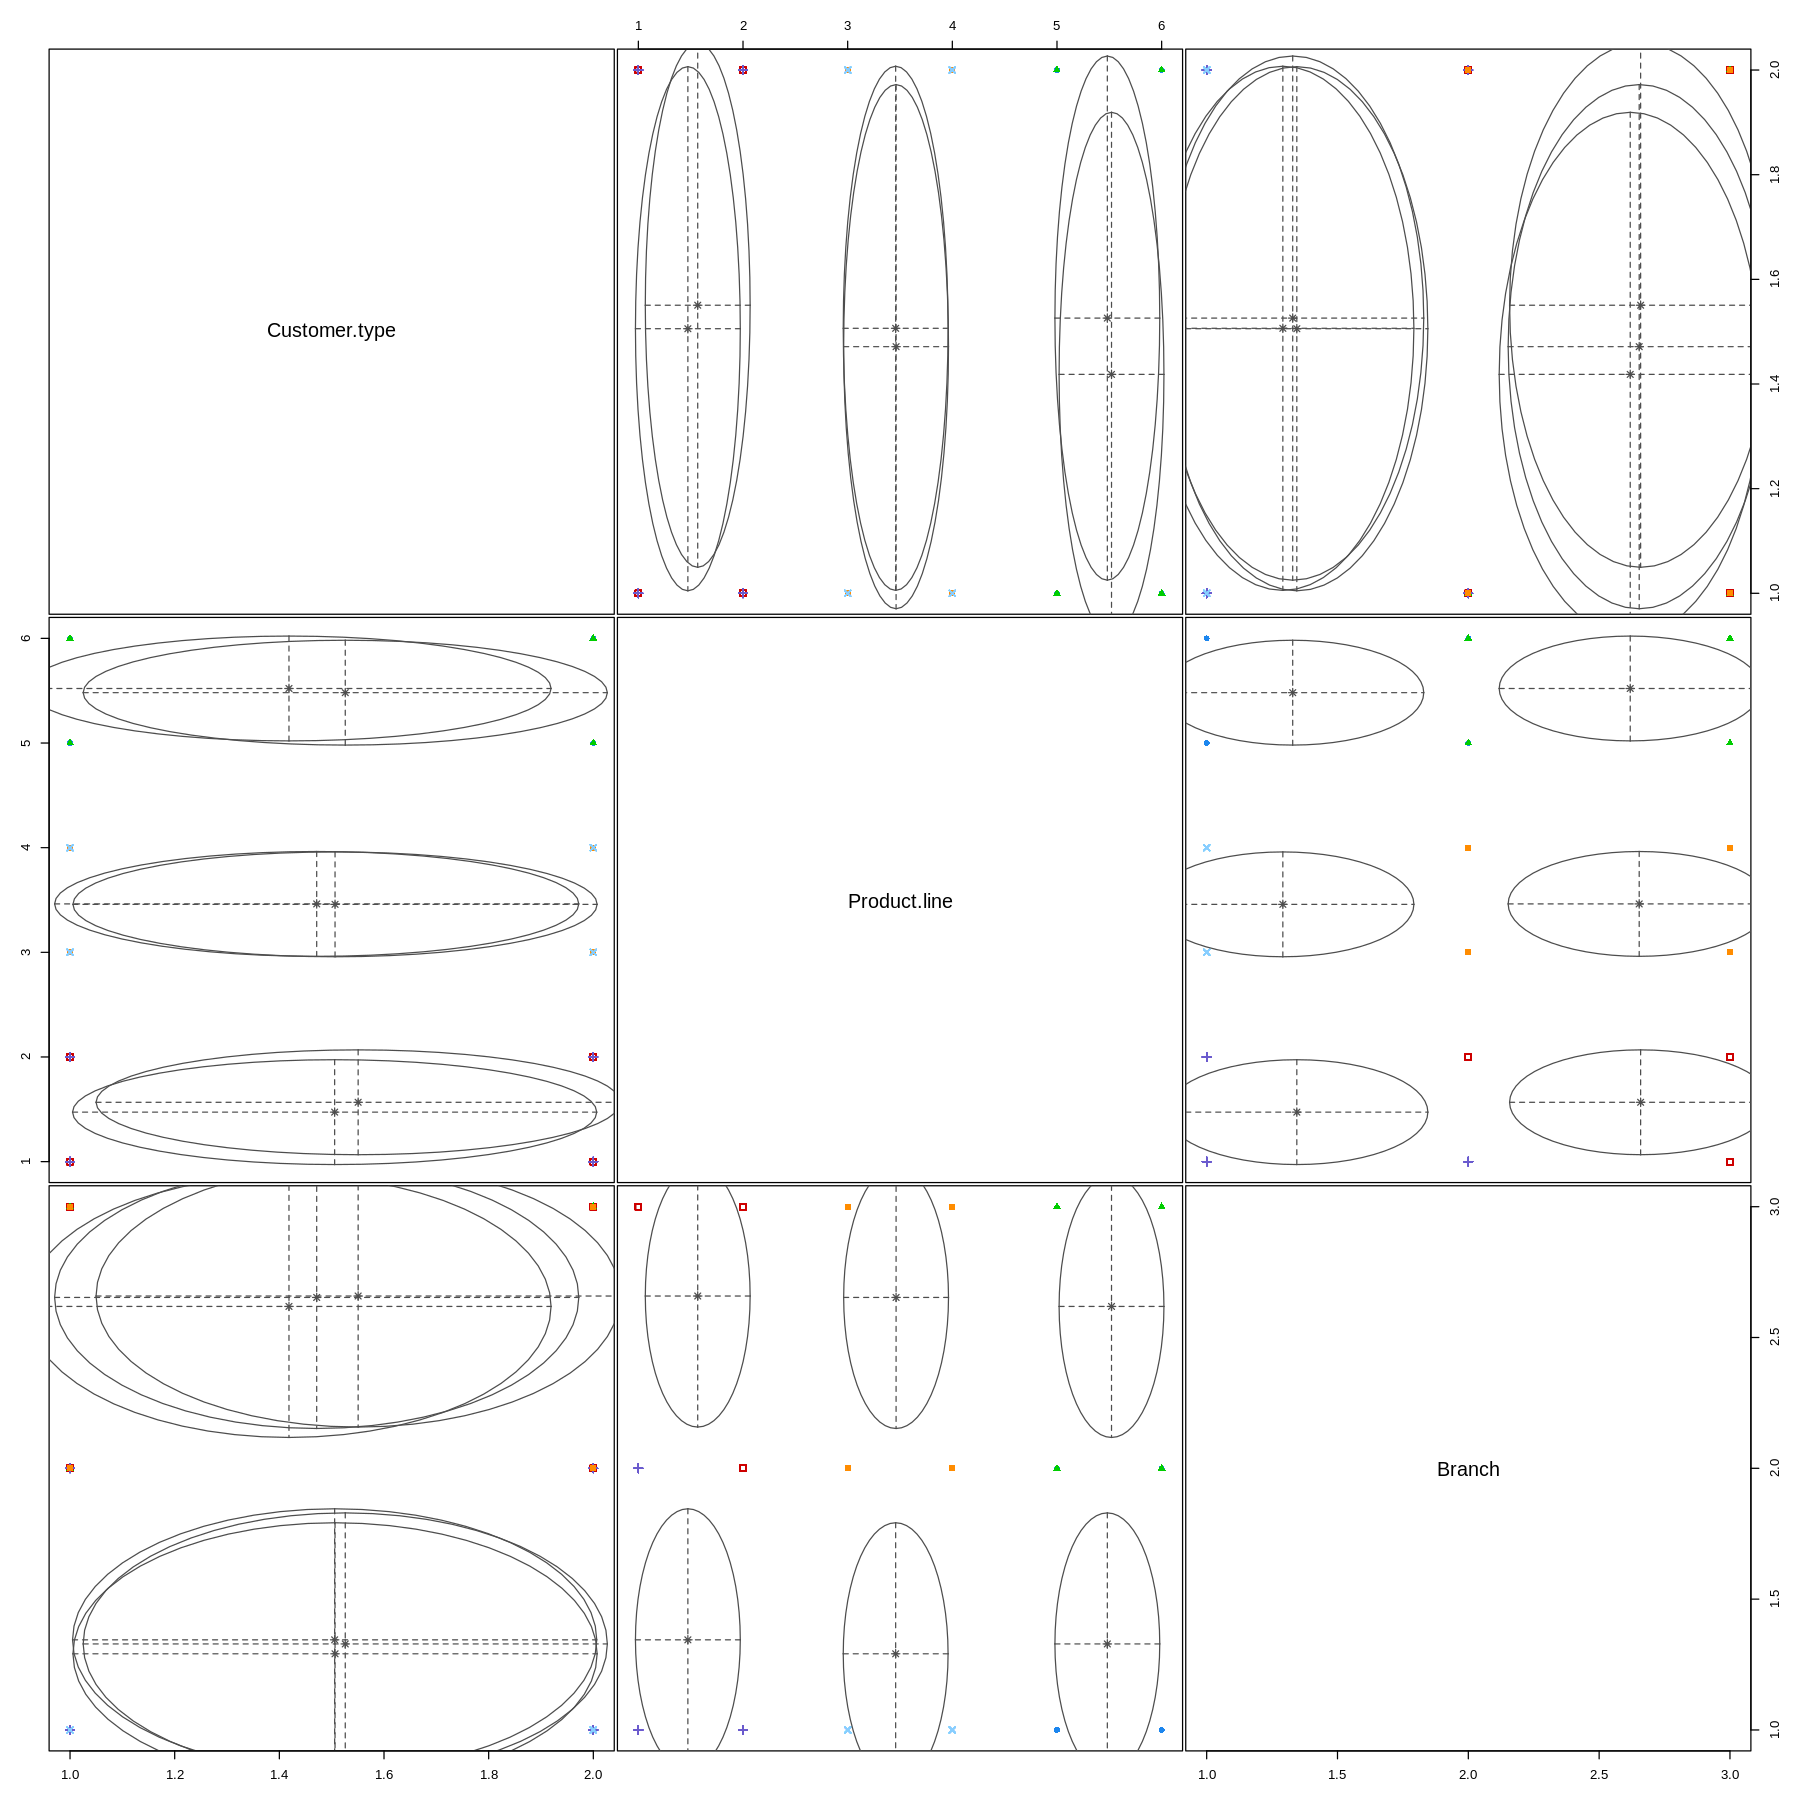

In [88]:
options(repr.plot.width = 15, repr.plot.height = 15)
plot(mod,c("classification"))


Feature Ranking

In [36]:
install.packages("FSelector")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’, ‘entropy’, ‘randomForest’, ‘RWeka’




In [37]:
library(FSelector)

In [38]:
# calculate the correlation coefficient
Scores <- linear.correlation(dataset_num)
Scores

,attr_importance
,<dbl>
Quantity,0.010777564
Tax,0.633962089
cogs,0.633962089
gross.income,0.633962089
Rating,0.008777507
Total,0.633962089
month,0.027387186
day,0.057020896


In [39]:

# From the output above, we observe a list containing 
# rows of variables on the left and score on the right. 
# In order to make a decision, we define a cutoff 
# i.e. suppose we want to use the top 5 representative variables, 
# through the use of the cutoff.k function included in the FSelector package. 
# Alternatively, we could define our cutoff visually 
# but in cases where there are few variables than in high dimensional datasets.
# 
# cutoff.k: The algorithms select a subset from a ranked attributes. 
# ---
#
Subset <- cutoff.k(Scores, 5)
as.data.frame(Subset)

Subset
<chr>
Tax
cogs
gross.income
Total
day


In [40]:

# We could also set cutoff as a percentage which would indicate 
# that we would want to work with the percentage of the best variables.
# ---
#
Subset2 <-cutoff.k.percent(Scores, 0.4)
as.data.frame(Subset2)

Subset2
<chr>
Tax
cogs
gross.income


# **Part 3: Association Rules**

In [41]:
# We first we install the required arules library 
#
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [42]:
# Loading the arules library
#
library(arules)

Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




In [43]:
# importing our data
# reading our data
path <-"http://bit.ly/SupermarketDatasetII"
association <-read.transactions(path, sep = ",")

Warning message in asMethod(object):
“removing duplicated items in transactions”


In [44]:
association

transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

In [45]:
# previewing the column names
colnames(association)

[1] "almonds"              "antioxydant juice"    "asparagus"           
  [4] "avocado"              "babies food"          "bacon"               
  [7] "barbecue sauce"       "black tea"            "blueberries"         
 [10] "body spray"           "bramble"              "brownies"            
 [13] "bug spray"            "burger sauce"         "burgers"             
 [16] "butter"               "cake"                 "candy bars"          
 [19] "carrots"              "cauliflower"          "cereals"             
 [22] "champagne"            "chicken"              "chili"               
 [25] "chocolate"            "chocolate bread"      "chutney"             
 [28] "cider"                "clothes accessories"  "cookies"             
 [31] "cooking oil"          "corn"                 "cottage cheese"      
 [34] "cream"                "dessert wine"         "eggplant"            
 [37] "eggs"                 "energy bar"           "energy drink"        
 [40] "escalope"             "extra dark chocolate" "flax seed"           
 [43] "french fries"         "french wine"          "fresh bread"         
 [46] "fresh tuna"           "fromage blanc"        "frozen smoothie"     
 [49] "frozen vegetables"    "gluten free bar"      "grated cheese"       
 [52] "green beans"          "green grapes"         "green tea"           
 [55] "ground beef"          "gums"                 "ham"                 
 [58] "hand protein bar"     "herb & pepper"        "honey"               
 [61] "hot dogs"             "ketchup"              "light cream"         
 [64] "light mayo"           "low fat yogurt"       "magazines"           
 [67] "mashed potato"        "mayonnaise"           "meatballs"           
 [70] "melons"               "milk"                 "mineral water"       
 [73] "mint"                 "mint green tea"       "muffins"             
 [76] "mushroom cream sauce" "napkins"              "nonfat milk"         
 [79] "oatmeal"              "oil"                  "olive oil"           
 [82] "pancakes"             "parmesan cheese"      "pasta"               
 [85] "pepper"               "pet food"             "pickles"             
 [88] "protein bar"          "red wine"             "rice"                
 [91] "salad"                "salmon"               "salt"                
 [94] "sandwich"             "shallot"              "shampoo"             
 [97] "shrimp"               "soda"                 "soup"                
[100] "spaghetti"            "sparkling water"      "spinach"             
[103] "strawberries"         "strong cheese"        "tea"                 
[106] "tomato juice"         "tomato sauce"         "tomatoes"            
[109] "toothpaste"           "turkey"               "vegetables mix"      
[112] "water spray"          "white wine"           "whole weat flour"    
[115] "whole wheat pasta"    "whole wheat rice"     "yams"                
[118] "yogurt cake"          "zucchini"

In [46]:
# verifying the class of the data
class(association)

[1] "transactions"
attr(,"package")
[1] "arules"

In [47]:
# preview the items that make up our dataset
items<-as.data.frame(itemLabels(association))
colnames(items) <- "Item"
head(items, 10)    

,Item
,<chr>
1,almonds
2,antioxydant juice
3,asparagus
4,avocado
5,babies food
6,bacon
7,barbecue sauce
8,black tea
9,blueberries


In [48]:
#  Generating a summary of the dataset
summary(association)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

In [49]:
# Exploring the frequency of some articles 
itemFrequency(association[, 8:10],type = "absolute")

black tea blueberries  body spray 
        107          69          86

In [50]:
round(itemFrequency(association[, 8:10],type = "relative")*100,2)

black tea blueberries  body spray 
       1.43        0.92        1.15

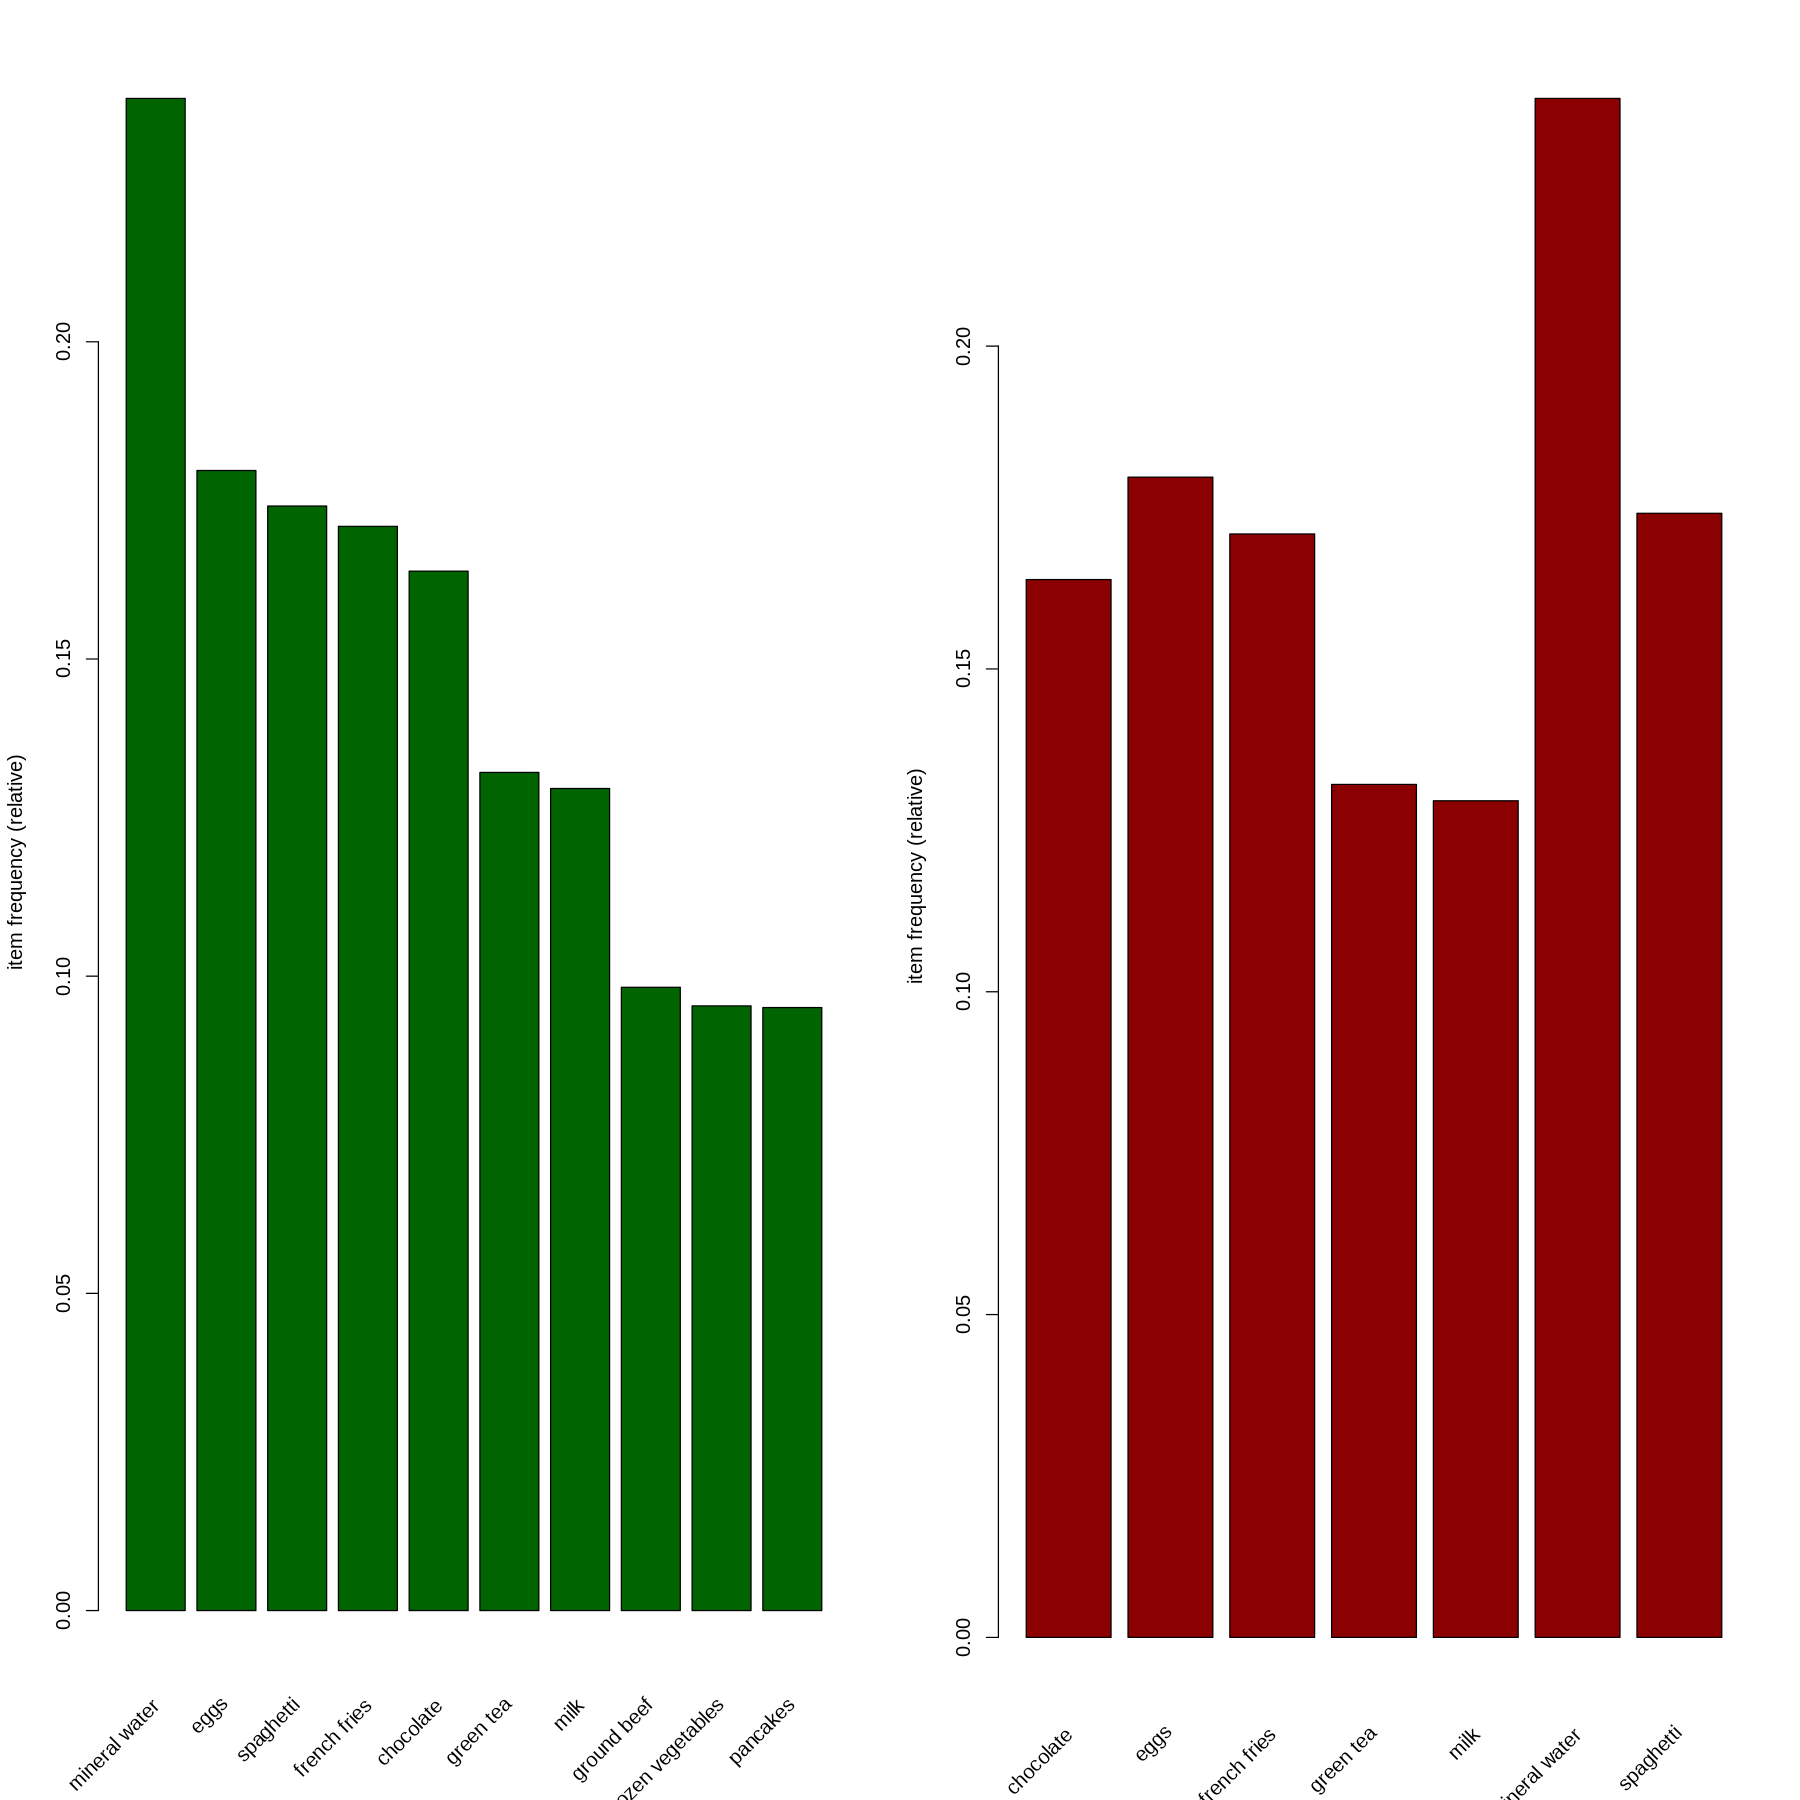

In [93]:
# Producing a chart of frequencies and fitering 
# Displaying top 10 most common items in the transactions dataset 
# and the items whose relative importance is at least 10%
par(mfrow = c(1, 2))
options(repr.plot.width = 15, repr.plot.height = 15)
# plot the frequency of items
itemFrequencyPlot(association, topN = 10,col="darkgreen")
itemFrequencyPlot(association, support = 0.1,col="darkred")

In [52]:
# Building a model based on association rules using the apriori function 
# We use Min Support as 0.001 and confidence as 0.8
rules <- apriori (association, parameter = list(supp = 0.001, conf = 0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [53]:
rules

set of 74 rules 

In [54]:


# using the  measures of significance and interest on the rules,determining which ones are interesting and which to discard.
# Building a apriori model with Min Support as 0.002 and confidence as 0.8.
rules2 <- apriori (association,parameter = list(supp = 0.002, conf = 0.8)) 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [55]:
# Building apriori model with Min Support as 0.002 and confidence as 0.6.
rules3 <- apriori (association, parameter = list(supp = 0.001, conf = 0.6)) 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [545 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [56]:
rules2

set of 2 rules 

In [57]:
rules3

set of 545 rules 

In [58]:
 # the first model had 74 rules while the second has 2. these had a confidence level of 0.8 but 
# different minimum supports. the same applies to the third that had 545 rules. 
# from this , we can conclude that a higher support level equals a loss in the rules while a low confidence level 
# equals a g=higher number of rules, though not all of them will be useful.

In [59]:
# performing an exploration of our model through the use of the summary function as shown
summary(rules)


set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001333   1st Qu.: 3.432  
 Median :0.001133   Median :0.8333   Median :0.001333   Median : 3.795  
 Mean   :0.001256   Mean   :0.8504   Mean   :0.001479   Mean   : 4.823  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001600   3rd Qu.: 4.877  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.500  
 Mean   : 9.419  
 3rd Qu.:10.000  
 Max.   :19.000  

mining info:
        data ntransactions support confidence
 association          7501   0.001        0.8

In [60]:
# the summary gives us the statistical data about the rules. this is inclusive of the support, confidence and also lift


In [61]:
# Observing rules built in our model i.e. first 5 model rules
inspect(rules[1:5])


    lhs                             rhs             support     confidence
[1] {frozen smoothie,spinach}    => {mineral water} 0.001066524 0.8888889 
[2] {bacon,pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3] {nonfat milk,turkey}         => {mineral water} 0.001199840 0.8181818 
[4] {ground beef,nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5] {mushroom cream sauce,pasta} => {escalope}      0.002532996 0.9500000 
    coverage    lift      count
[1] 0.001199840  3.729058  8   
[2] 0.002133049  4.666587 13   
[3] 0.001466471  3.432428  9   
[4] 0.001866418  3.595877 12   
[5] 0.002666311 11.976387 19   


In [62]:
# Interpretation of the rules:
# 1: If someone buys frozen smoothie and spinach, they are 89% likely to buy mineral water too
# 1: If someone buys bacon and pancakes, they are 81% likely to buy spaghetti too
# 1: If someone buys nonfat milk and turkey, they are 82% likely to buy mineral water too
# 1: If someone buys ground beef and nonfat milk, they are 86% likely to buy mineral water too
# 1: If someone buys frozen mushroom cream sauce and pasta, they are 95% likely to buy escalope too


In [63]:
# Ordering these rules by a criteria such as the level of confidence
# then looking at the first five rules.
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])


    lhs                                          rhs             support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[2] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
[3] {cake,meatballs,mineral water}            => {milk}          0.001066524
[4] {cake,olive oil,shrimp}                   => {mineral water} 0.001199840
[5] {mushroom cream sauce,pasta}              => {escalope}      0.002532996
    confidence coverage    lift      count
[1] 1.00       0.001066524 12.606723  8   
[2] 1.00       0.001199840  4.195190  9   
[3] 1.00       0.001066524  7.717078  8   
[4] 1.00       0.001199840  4.195190  9   
[5] 0.95       0.002666311 11.976387 19   


In [64]:
# Interpretation
# Four of the given five rules have a confidence of 100 and the fifth rule has a confidence of 95
# ---


In [65]:
# If we're interested in making a promotion relating to the sale of milk, 
# we could create a subset of rules concerning these products 
# ---
# This would tell us the items that the customers bought before purchasing milk
# ---
# 
milk <- subset(rules, subset = rhs %pin% "milk")
 
# Then order by confidence
milk<-sort(milk, by="confidence", decreasing=TRUE)
milk

set of 5 rules 

In [66]:
inspect(milk[1:5])


    lhs                                  rhs    support     confidence
[1] {cake,meatballs,mineral water}    => {milk} 0.001066524 1.0000000 
[2] {escalope,hot dogs,mineral water} => {milk} 0.001066524 0.8888889 
[3] {meatballs,whole wheat pasta}     => {milk} 0.001333156 0.8333333 
[4] {black tea,frozen smoothie}       => {milk} 0.001199840 0.8181818 
[5] {burgers,ground beef,olive oil}   => {milk} 0.001066524 0.8000000 
    coverage    lift     count
[1] 0.001066524 7.717078  8   
[2] 0.001199840 6.859625  8   
[3] 0.001599787 6.430898 10   
[4] 0.001466471 6.313973  9   
[5] 0.001333156 6.173663  8   


In [67]:
# What if we wanted to determine items that customers might buy 
# who have previously bought milk?
# ---
# 
# Subset the rules
milk <- subset(rules, subset = lhs %pin% "milk")

# Order by confidence
milk<-sort(milk, by="confidence", decreasing=TRUE)

# inspect top 5
inspect(milk[15:19])


    lhs                                rhs             support     confidence
[1] {chocolate,hot dogs,milk}       => {mineral water} 0.001066524 0.8       
[2] {avocado,burgers,milk}          => {spaghetti}     0.001066524 0.8       
[3] {cookies,green tea,milk}        => {french fries}  0.001066524 0.8       
[4] {cake,eggs,milk,turkey}         => {mineral water} 0.001066524 0.8       
[5] {chocolate,eggs,milk,olive oil} => {mineral water} 0.001066524 0.8       
    coverage    lift     count
[1] 0.001333156 3.356152 8    
[2] 0.001333156 4.594793 8    
[3] 0.001333156 4.680811 8    
[4] 0.001333156 3.356152 8    
[5] 0.001333156 3.356152 8    


# **Part 4: Anomaly Detection**

In [68]:
# Installing anomalize package
# ---
# 
install.packages("anomalize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘TTR’, ‘future’, ‘globals’, ‘later’, ‘quadprog’, ‘quantmod’, ‘furrr’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘zoo’, ‘slider’, ‘anytime’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’




In [69]:
# Load tidyverse and anomalize
# ---
# 
library(tidyverse)
library(anomalize)
library(lubridate)
library(tibbletime)
library(data.table)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ plyr::arrange()          masks dplyr::arrange()
✖ lubridate::as.difftime() masks base::as.difftime()
✖ readr::col_factor()      masks scales::col_factor()
✖ purrr::compact()         masks plyr::compact()
✖ plyr::count()            masks dplyr::count()
✖ lubridate::date()        masks base::date()
✖ purrr::discard()         masks scales::discard()
✖ tidyr::expand()          masks Matrix::expand()
✖ plyr::failwith()         masks dplyr::failwith()
✖ dplyr::filter()          masks stats::filter()
✖ plyr::id()               masks dplyr::id()
✖ arules::intersect()      masks lubridate::intersect(), base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ purrr::lift()            masks caret::lift()
✖ purrr::map()

In [70]:
# Read the data 

sales <- fread("http://bit.ly/CarreFourSalesDataset")

In [71]:
# checking the head
head(sales, 3)

Date,Sales
<chr>,<dbl>
1/5/2019,548.9715
3/8/2019,80.2200
3/3/2019,340.5255


In [72]:
# Checking data types
sapply(sales ,class)

Date       Sales 
"character"   "numeric"

In [73]:
#Checking for missing values
colSums(is.na(sales))

Date Sales 
    0     0

In [74]:
# duplicates
sum(duplicated(sales))

[1] 0

In [75]:
# Changing date to proper data type
sales$Date <- as.Date(sales$Date, format = "%m/%d/%Y")

In [76]:
# preview changes
head(sales, 2)

Date,Sales
<date>,<dbl>
2019-01-05,548.9715
2019-03-08,80.2200


In [77]:
new_sales <- as.tibble(sales)

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [78]:
#aggregating sales values to get daily records
new_sales.agg <- aggregate(new_sales["Sales"], by=new_sales["Date"],sum)
head(new_sales.agg)

,Date,Sales
,<date>,<dbl>
1,2019-01-01,4745.181
2,2019-01-02,1945.503
3,2019-01-03,2078.128
4,2019-01-04,1623.688
5,2019-01-05,3536.684
6,2019-01-06,3614.205


In [79]:
new_sales.agg <- as.tibble(new_sales.agg)
is_tibble(new_sales.agg)

[1] TRUE

In [80]:

anomaly.detect <- new_sales.agg %>%
time_decompose(Sales, method = "stl", frequency = "auto", trend = "auto") %>%
anomalize(remainder, method = "gesd", alpha = 0.05, max_anoms = 0.2) %>%
plot_anomaly_decomposition()

Converting from tbl_df to tbl_time.
Auto-index message: index = Date

frequency = 7 days

trend = 30 days

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



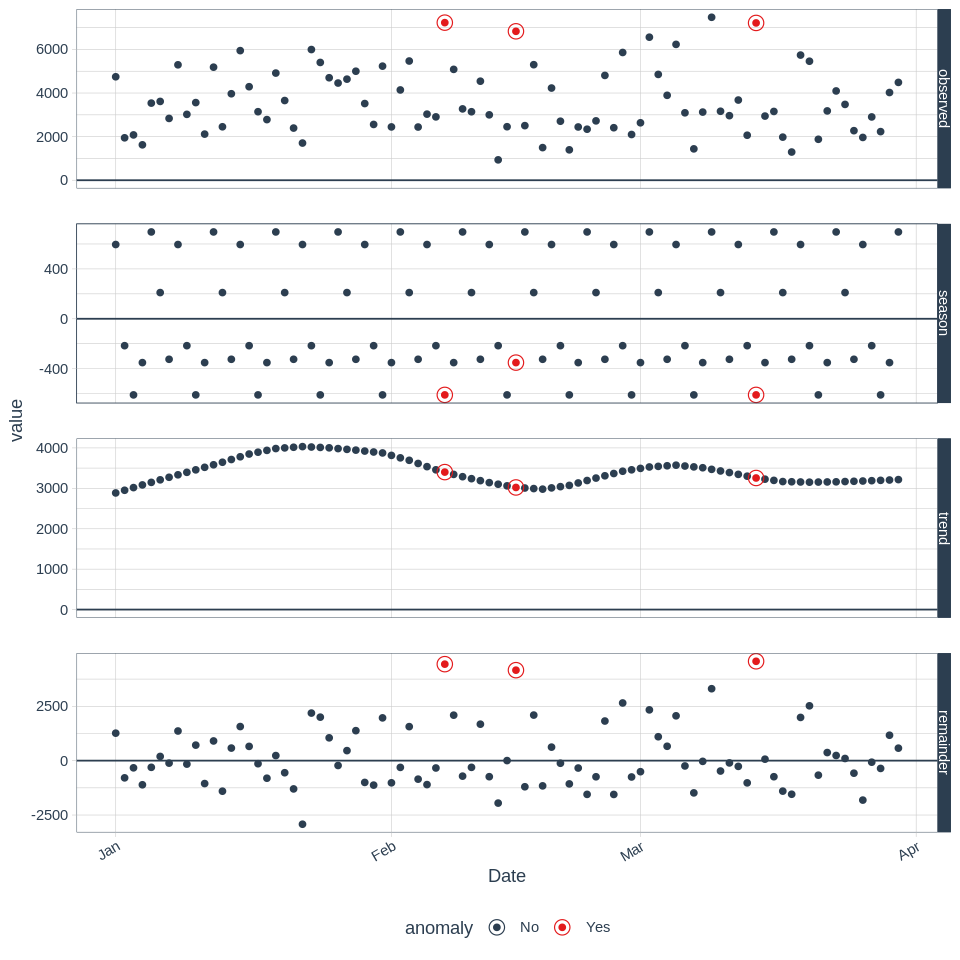

In [81]:
options(repr.plot.width = 8, repr.plot.height = 8)
anomaly.detect

In [84]:
# Conclusions
# The sales data seems to contain some anomalies as shown by the red points on the graph above It would be important for the marketing
# team to check them out to ascertain they are not fraud.